<a href="https://colab.research.google.com/github/Karenpess/dsa/blob/main/varejo_dsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise Exploratória na área de Varejo

In [1]:
# Versão da linguagem python
from platform import python_version
print("A versão da linguagem Python usada neste notebook é ", python_version())

A versão da linguagem Python usada neste notebook é  3.10.12


In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [7]:
# Carrega o dataset
df_dsa = pd.read_csv('/dataset.csv')

In [11]:
# Visualizando as primeiras linhas do banco de dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [13]:
# Solicitando as dimensões do banco de dados
df_dsa.shape

(9700, 11)

In [14]:
# Verificando os nomes das variáveis
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [21]:
# Verificando os tipos de cada variável
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [20]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [22]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [23]:
# Verificando a presença de dados duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [25]:
# Verificando a presença de valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

Pergunta 1.	Qual cidade com maior valor de venda de produtos da categoria office supplies?

In [26]:
# filtro da categoria desejada 'Office Supplies'
df_cat_os = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [36]:
# agrupamento por 'Cidade' e soma do 'Valor_Venda'
df_cat_os_total = df_cat_os.groupby('Cidade')['Valor_Venda'].sum()

In [30]:
# rank de 'Cidade' por 'Valor_Venda'
cid_maior_venda = df_cat_os_total.idxmax()
print("Cidade com maior valor de venda para 'Office Supplies':", cid_maior_venda)

Cidade com maior valor de venda para 'Office Supplies': New York City


In [33]:
# conferindo o resultado
df_cat_os_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

Pergunta 2.	Qual o total de vendas por data do pedido? Demonstre o resultado através de um gráfico de barras.

In [57]:
# agrupamento por 'Data_Pedido' e soma do 'Valor_Venda'
df_dp = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [38]:
df_dp.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

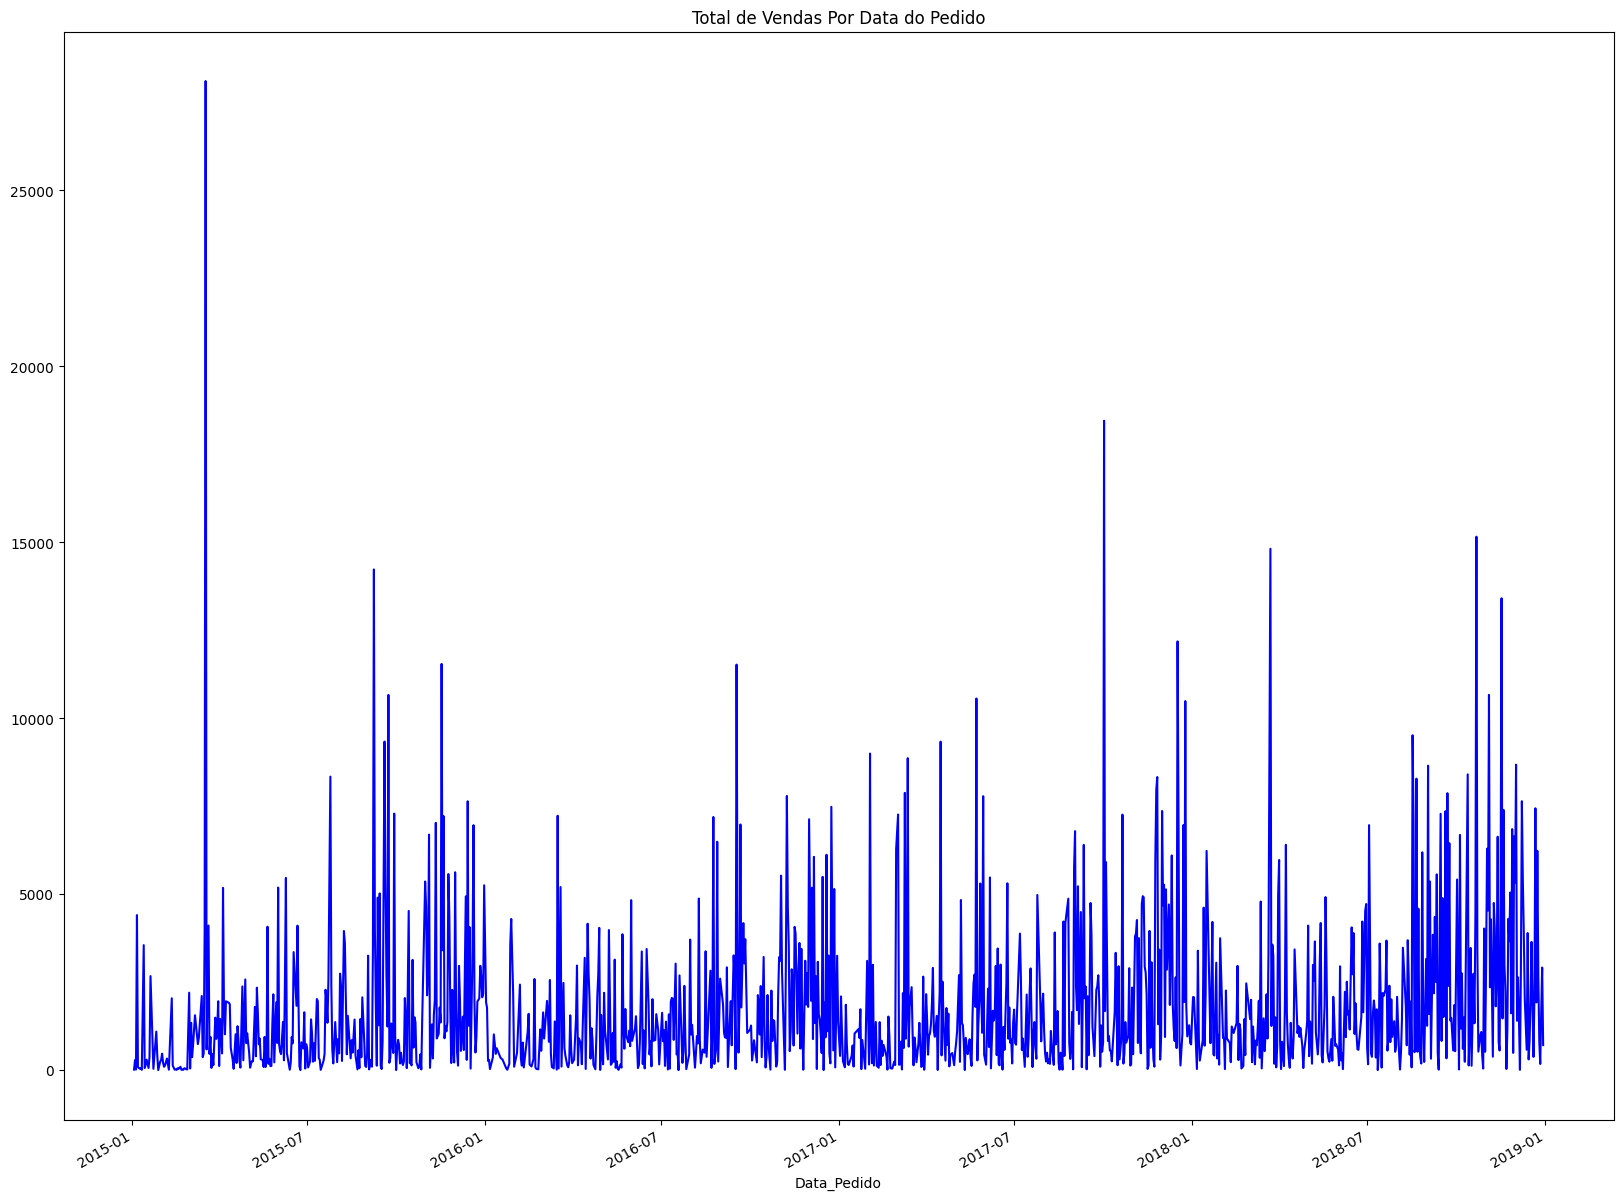

In [58]:
# Plot
plt.figure(figsize = (20, 16))
df_dp.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

Pergunta 3.	Qual o total de vendas por estado? Demonstre o resultado através de um gráfico de barras.

In [60]:
# agrupamento por 'Estado' e soma do 'Valor_Venda'
df_est = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

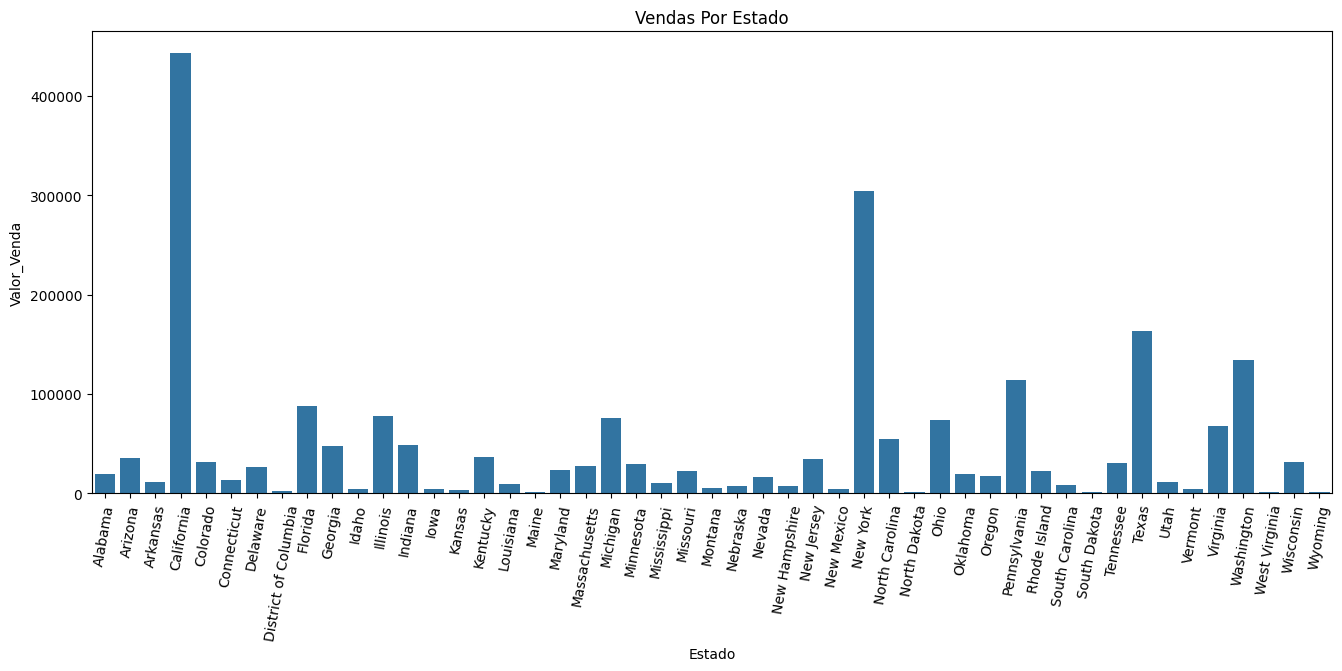

In [44]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_est,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

Pergunta 4.	Quais são as 10 cidades com maior total de vendas? Demonstre o resultado através de um gráfico de barras.

In [61]:
# agrupamento por 'Cidade' e soma do 'Valor_Venda'
df_cid = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

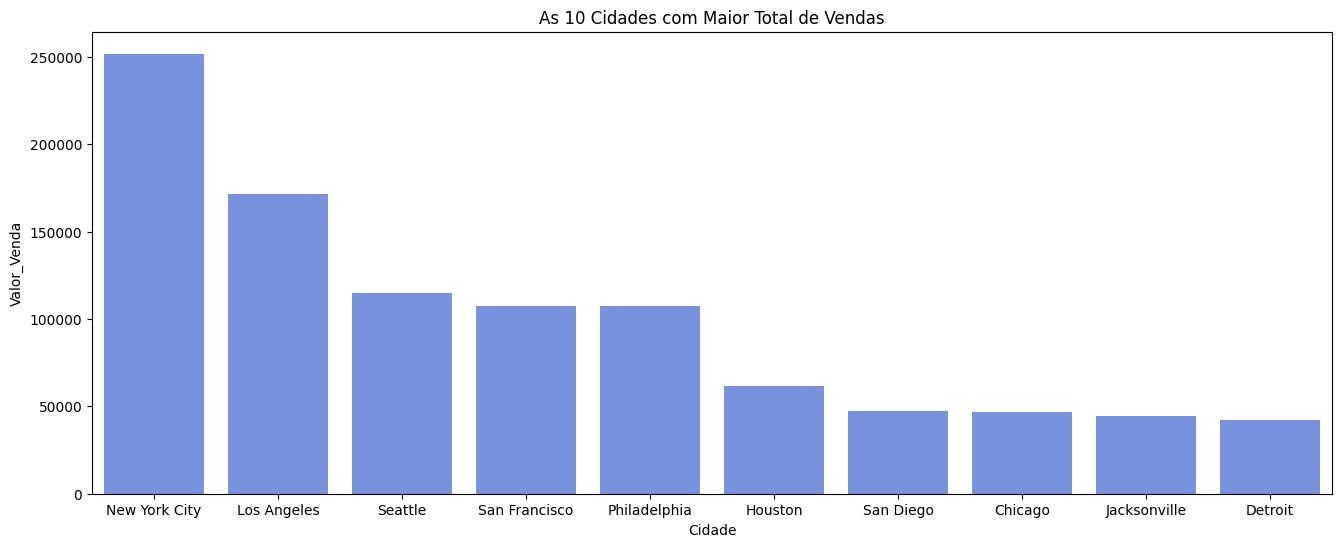

In [71]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_cid,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

Pergunta 5.	Qual segmento teve o maior total de vendas? Demonstre o resultado através de um gráfico de pizza.

In [89]:
# agrupamento por 'Segmento' e soma do 'Valor_Venda'
df_seg = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [75]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

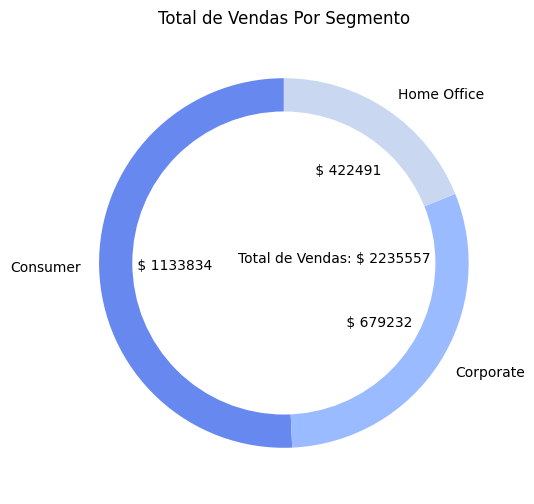

In [79]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df_seg['Valor_Venda'],
        labels = df_seg['Segmento'],
        autopct = autopct_format(df_seg['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_seg['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

Pergunta 6.	Qual o total de vendas por segmento e por ano?

In [87]:
# Extrair o Ano da 'Data_Pedido'
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [91]:
# agrupamento por 'Segmento' e  'Ano' e soma do 'Valor_Venda'
df_ano_seg = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().reset_index()

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


from matplotlib import pyplot as plt
df_ano_seg['Ano'].plot(kind='hist', bins=20, title='Ano')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ano_seg['Valor_Venda'].plot(kind='hist', bins=20, title='Valor_Venda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_ano_seg.groupby('Segmento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ano_seg.plot(kind='scatter', x='Ano', y='Valor_Venda', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ano']
  ys = series['Valor_Venda']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_ano_seg.sort_values('Ano', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Segmento')):
  _plot_series(series, series_name, i)
  fig.legend(title='Segmento', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('Valor_Venda')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ano']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ano'}, axis=1)
              .sort_values('Ano', ascending=True))
  xs = counted['Ano']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_ano_seg.sort_values('Ano', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Segmento')):
  _plot_series(series, series_name, i)
  fig.legend(title='Segmento', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_ano_seg['Ano'].plot(kind='line', figsize=(8, 4), title='Ano')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ano_seg['Valor_Venda'].plot(kind='line', figsize=(8, 4), title='Valor_Venda')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ano_seg['Segmento'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ano_seg, x='Ano', y='Segmento', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ano_seg['Segmento'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ano_seg, x='Valor_Venda', y='Segmento', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)